In [67]:
import pandas as pd
import numpy as np
import json
from IPython.display import display

import matplotlib
from matplotlib import *
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
import scipy.stats as stats
import scipy.io
from scipy.spatial import distance as Distance
from scipy.stats import ttest_ind
from scipy.stats import binom_test

# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

import random
random.seed(9001)

%matplotlib inline

## sklearn imports
# import sklearn.linear_model
# import sklearn.cross_validation
# import sklearn.tree
# import sklearn.ensemble
# import sklearn.preprocessing
# import sklearn.feature_selection
# import sklearn.pipeline
# import sklearn.grid_search

In [143]:
# main directory where data is stored
mainDir = '/Users/adam2392/Documents/MATLAB/Neural_Interaction_Lab_MatlabForPD/Clinical Data/'

## 1. Analyze On vs. Off Clinical Data

In [135]:
controlClinFile = mainDir + 'GaitUPDRSOn_AL.csv'
offMedsClinFile = mainDir + 'GaitUPDRSOff_AL.csv'

controlClin = pd.DataFrame.from_csv(onMedsClinFile, index_col=False)
offMedsClin = pd.DataFrame.from_csv(offMedsClinFile, index_col=False)

# split the off meds file into on and off meds
# off = <number>.1 and on = <number>.2
offMedsClin['Patient Number'] = offMedsClin['Patient Number'].astype(str)
onMedsClin = offMedsClin[offMedsClin['Patient Number'].str.contains('.2')]
onMedsClin = onMedsClin[onMedsClin['Patient Number'].str.contains('12.1') == False]
onMedsClin = onMedsClin[onMedsClin['Patient Number'].str.contains('22.1') == False]

# get rid of the on med patients in off meds df now
merged = onMedsClin.merge(offMedsClin)
offMedsClin = offMedsClin[(~offMedsClin['Patient Number'].isin(merged['Patient Number']))]

In [136]:
display(controlClin.transpose())
display(offMedsClin.transpose().head())

print pd.DataFrame({"Control patients": controlClin['Patient Number'],
                    "Off med patients": offMedsClin['Patient Number'],
                    "On med patients": onMedsClin['Patient Number']})

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Patient Number,101,102,103,104,105,106,107,108,109,110,...,112,113,114,115,116,117,118,119,120,121
Date,7-Aug,14-Jul,18-Aug,18-Aug,27-Aug,27-Aug,27-Aug,27-Aug,17-Sep,17-Sep,...,8-Oct,18-Oct,18-Oct,18-Oct,18-Oct,18-Oct,28-Oct,18-Nov,18-Nov,18-Nov
Height (inches),61,59,63.2,62.5,61.3,70.8,69.8,61.5,65.4,67.25,...,66,71.8,65.1,69.8,66,63.2,64,68.2,70,62.4
Height (meters),1.55,1.5,1.61,1.59,1.56,1.8,1.77,1.56,1.66,1.71,...,1.68,1.82,1.65,1.77,1.68,1.61,1.63,1.73,1.78,1.58
Age,63,70,63,46,77,43,65,46,58,79,...,67,74,77,57,66,72,60,74,75,67
Gender,Female,Female,Female,Female,Female,Male,Male,Female,Female,Male,...,Male,Male,Male,Male,Male,Female,Female,Male,Male,Female
Weight,164,160,133,147.4,145.4,181.6,180.8,226.2,130.8,217.4,...,166,201.4,171.6,186.2,156.6,163.2,147.6,183.4,183.2,185.8
Gait,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Freezing of Gait,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leg Agility (Right),NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,12,14,16,18,20,22,24,27,29,31
Patient Number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.1,13.1,14.1,15.1,16.1,17.1,18.1,20.1,21.1,22.1
Date,7-Aug,7-Aug,7-Aug,14-Jul,18-Aug,18-Aug,18-Aug,27-Aug,27-Aug,27-Aug,...,4-Oct,4-Oct,4-Oct,8-Oct,18-Oct,18-Oct,18-Oct,28-Oct,18-Nov,18-Nov
Height (inches),71,64,67.2,65,NaN,NaN,69.8,66,NaN,66,...,63,70.1,68.8,63,60.3,68,62,65.6,64,64.3
Height (meters),1.8,1.63,1.71,1.65,NaN,NaN,1.77,1.68,NaN,1.68,...,1.6,1.78,1.75,1.6,1.53,1.73,1.57,1.67,1.63,1.63
Age,63,77,79,68,68,50,56,77,69,57,...,76,52,66,76,72,55,78,65,71,73


    Control patients Off med patients On med patients
0              101.0              1.0             NaN
1              102.0              2.0             NaN
2              103.0              3.0             NaN
3              104.0              4.0             NaN
4              105.0              5.0             NaN
5              106.0              6.0             NaN
6              107.0              7.0             NaN
7              108.0              8.0             NaN
8              109.0              9.0             NaN
9              110.0             10.0             NaN
10             111.0             11.1             NaN
11             112.0              NaN            11.2
12             113.0             12.1             NaN
13             114.0              NaN            12.2
14             115.0             13.1             NaN
15             116.0              NaN            13.2
16             117.0             14.1             NaN
17             118.0        

### Clean Data
1. Replace and map female = 1, male = 0

In [137]:
on_sex = pd.get_dummies(onMedsClin['Gender'])
onMedsClin = pd.concat([onMedsClin, on_sex], axis=1)
off_sex = pd.get_dummies(offMedsClin['Gender'])
offMedsClin = pd.concat([offMedsClin, off_sex], axis=1)
control_sex = pd.get_dummies(controlClin['Gender'])
controlClin = pd.concat([controlClin, control_sex], axis=1)

display(controlClin.transpose().head())
display(onMedsClin.transpose().head())
display(offMedsClin.transpose().head())


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Patient Number,101,102,103,104,105,106,107,108,109,110,...,112,113,114,115,116,117,118,119,120,121
Date,7-Aug,14-Jul,18-Aug,18-Aug,27-Aug,27-Aug,27-Aug,27-Aug,17-Sep,17-Sep,...,8-Oct,18-Oct,18-Oct,18-Oct,18-Oct,18-Oct,28-Oct,18-Nov,18-Nov,18-Nov
Height (inches),61,59,63.2,62.5,61.3,70.8,69.8,61.5,65.4,67.25,...,66,71.8,65.1,69.8,66,63.2,64,68.2,70,62.4
Height (meters),1.55,1.5,1.61,1.59,1.56,1.8,1.77,1.56,1.66,1.71,...,1.68,1.82,1.65,1.77,1.68,1.61,1.63,1.73,1.78,1.58
Age,63,70,63,46,77,43,65,46,58,79,...,67,74,77,57,66,72,60,74,75,67
Gender,Female,Female,Female,Female,Female,Male,Male,Female,Female,Male,...,Male,Male,Male,Male,Male,Female,Female,Male,Male,Female
Weight,164,160,133,147.4,145.4,181.6,180.8,226.2,130.8,217.4,...,166,201.4,171.6,186.2,156.6,163.2,147.6,183.4,183.2,185.8
Gait,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Freezing of Gait,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leg Agility (Right),NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,11,13,15,17,19,21,23,25,26,28,30,32
Patient Number,11.2,12.2,13.2,14.2,15.2,16.2,17.2,18.2,19.2,20.2,21.2,22.2
Date,17-Sep,4-Oct,4-Oct,4-Oct,8-Oct,18-Oct,18-Oct,18-Oct,18-Oct,28-Oct,18-Nov,18-Nov
Height (inches),67,63,70.1,68.8,63,60.3,68,62,66.5,65.6,64,64.3
Height (meters),1.7,1.6,1.78,1.75,1.6,1.53,1.73,1.57,1.69,1.67,1.63,1.63
Age,58,76,52,66,76,72,55,78,54,65,71,73
Gender,Male,Female,Male,Male,Female,Female,Female,Female,Female,Female,Female,Female
Weight,157,156.2,156.6,142.8,108.4,124.4,151,NaN,154.8,92.6,136.6,168.4
Gait,0,0-1,0,0,0,2,0,1,2,1,0,0-1
Freezing of Gait,0,0,0,0,0,1,0,1,1,0,0,1
Leg Agility (Right),1,0,0,1,0,0,0,1,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,12,14,16,18,20,22,24,27,29,31
Patient Number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.1,13.1,14.1,15.1,16.1,17.1,18.1,20.1,21.1,22.1
Date,7-Aug,7-Aug,7-Aug,14-Jul,18-Aug,18-Aug,18-Aug,27-Aug,27-Aug,27-Aug,...,4-Oct,4-Oct,4-Oct,8-Oct,18-Oct,18-Oct,18-Oct,28-Oct,18-Nov,18-Nov
Height (inches),71,64,67.2,65,NaN,NaN,69.8,66,NaN,66,...,63,70.1,68.8,63,60.3,68,62,65.6,64,64.3
Height (meters),1.8,1.63,1.71,1.65,NaN,NaN,1.77,1.68,NaN,1.68,...,1.6,1.78,1.75,1.6,1.53,1.73,1.57,1.67,1.63,1.63
Age,63,77,79,68,68,50,56,77,69,57,...,76,52,66,76,72,55,78,65,71,73
Gender,Male,Female,Male,Female,Female,Male,Male,Male,Male,Male,...,Female,Male,Male,Female,Female,Female,Female,Female,Female,Female
Weight,164,146,163,185,NaN,NaN,242.2,149.8,NaN,125.4,...,156.2,156.6,142.8,108.4,124.4,151,NaN,92.6,136.6,168.4
Gait,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,2,0,2,1,0,1
Freezing of Gait,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,2,0,0,0
Leg Agility (Right),0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,2,0,0,1


### 1b On vs Off Med Patients

Independent T-test between On Meds and Off Meds Ages (P-Value):  0.85494604376
Independent T-test between On Meds and Off Meds Heights (P-Value):  0.571994314202
Binomial Test between On Meds and Off Meds Gender (P-Value): 
on meds:  0.14599609375
off meds:  1.0
Independent T-test between On Meds and Off Meds Weights (P-Value):  0.372471132699


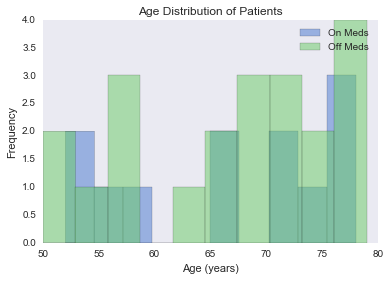

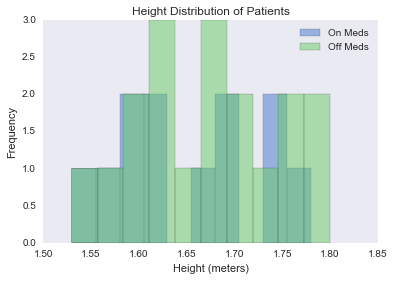

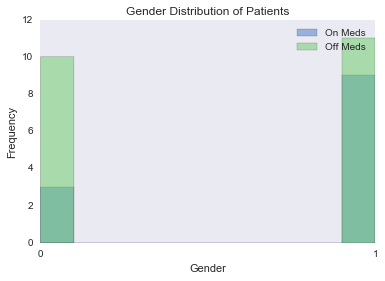

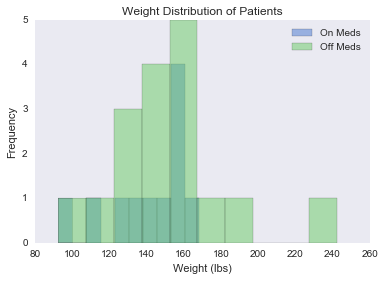

In [138]:
'''
Clean Data Row by Row
'''
## 01: Show distribution of age groups and compare contrast
onAge = onMedsClin['Age']
offAge = offMedsClin['Age']

onvsoffage = ttest_ind(a=onAge, b=offAge)

fig = plt.figure()
onAge.plot.hist(alpha=0.5)
offAge.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Age (years)')
plt.title('Age Distribution of Patients')
plt.legend(['On Meds', 'Off Meds'])

print "Independent T-test between On Meds and Off Meds Ages (P-Value): ", onvsoffage[1]

## 02: Show distribution between heights
# filter out nans
onHeight = onMedsClin['Height (meters)'].dropna()
offHeight = offMedsClin['Height (meters)'].dropna()
onvsoffheight = ttest_ind(a=onHeight, b=offHeight)

fig = plt.figure()
onHeight.plot.hist(alpha=0.5)
offHeight.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Height (meters)')
plt.title('Height Distribution of Patients')
plt.legend(['On Meds', 'Off Meds'])

print "Independent T-test between On Meds and Off Meds Heights (P-Value): ", onvsoffheight[1]

## 03: Show distribution between Genders
# filter out nans
onGender = onMedsClin['Female']
offGender = offMedsClin['Female']
on_test = binom_test(len(onGender[onGender==1]), n=len(onGender), p=0.5)
off_test = binom_test(len(offGender[offGender==1]), n=len(offGender), p=0.5)

fig = plt.figure()
onGender.plot.hist(alpha=0.5)
offGender.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Gender')
plt.xticks([0, 1])
plt.title('Gender Distribution of Patients')
plt.legend(['On Meds', 'Off Meds'])

print "Binomial Test between On Meds and Off Meds Gender (P-Value): "
print 'on meds: ', on_test
print 'off meds: ',off_test

## 04: Show distribution between weight
# filter out nans
onWeight = onMedsClin['Weight'].dropna()
offWeight = offMedsClin['Weight'].dropna()
onvsoffweight = ttest_ind(a=onWeight, b=offWeight)

fig = plt.figure()
onWeight.plot.hist(alpha=0.5)
offWeight.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Weight (lbs)')
plt.title('Weight Distribution of Patients')
plt.legend(['On Meds', 'Off Meds'])

print "Independent T-test between On Meds and Off Meds Weights (P-Value): ", onvsoffweight[1]


In [139]:
print "STD of off meds weight: ", np.std(offWeight)
print "STD of on meds weight: ", np.std(onWeight)

STD of off meds weight:  31.6901739981
STD of on meds weight:  22.3090686819


## 1c Off Meds vs Control Patients

Independent T-test between Control and Off Meds Ages (P-Value):  0.389299410707
Independent T-test between Control and Off Meds Heights (P-Value):  0.571994314202
Binomial Test between Control and Off Meds Gender (P-Value): 
on meds:  1.0
off meds:  1.0
Independent T-test between Control and Off Meds Weights (P-Value):  0.372471132699


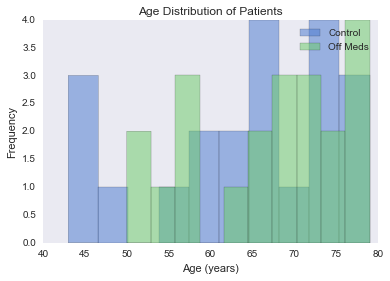

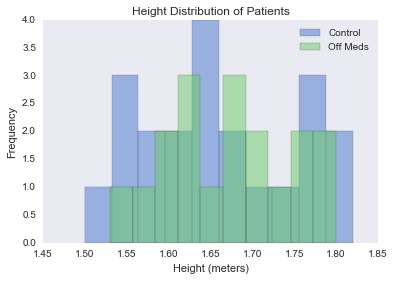

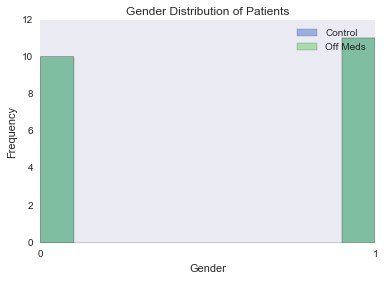

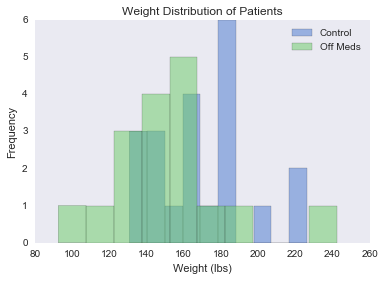

In [140]:
'''
Clean Data Row by Row
'''
## 01: Show distribution of age groups and compare contrast
controlAge = controlClin['Age']
offAge = offMedsClin['Age']

controlvsoffage = ttest_ind(a=controlAge, b=offAge)

fig = plt.figure()
controlAge.plot.hist(alpha=0.5)
offAge.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Age (years)')
plt.title('Age Distribution of Patients')
plt.legend(['Control', 'Off Meds'])

print "Independent T-test between Control and Off Meds Ages (P-Value): ", controlvsoffage[1]

## 02: Show distribution between heights
# filter out nans
controlHeight = controlClin['Height (meters)'].dropna()
offHeight = offMedsClin['Height (meters)'].dropna()
controlvsoffheight = ttest_ind(a=controlHeight, b=offHeight)

fig = plt.figure()
controlHeight.plot.hist(alpha=0.5)
offHeight.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Height (meters)')
plt.title('Height Distribution of Patients')
plt.legend(['Control', 'Off Meds'])

print "Independent T-test between Control and Off Meds Heights (P-Value): ", onvsoffheight[1]

## 03: Show distribution between Genders
# filter out nans
controlGender = controlClin['Female']
offGender = offMedsClin['Female']
control_test = binom_test(len(controlGender[controlGender==1]), n=len(controlGender), p=0.5)
off_test = binom_test(len(offGender[offGender==1]), n=len(offGender), p=0.5)

fig = plt.figure()
controlGender.plot.hist(alpha=0.5)
offGender.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Gender')
plt.xticks([0, 1])
plt.title('Gender Distribution of Patients')
plt.legend(['Control', 'Off Meds'])

print "Binomial Test between Control and Off Meds Gender (P-Value): "
print 'on meds: ', control_test
print 'off meds: ',off_test

## 04: Show distribution between weight
# filter out nans
controlWeight = controlClin['Weight'].dropna()
offWeight = offMedsClin['Weight'].dropna()
controlvsoffweight = ttest_ind(a=controlWeight, b=offWeight)

fig = plt.figure()
controlWeight.plot.hist(alpha=0.5)
offWeight.plot.hist(alpha=0.5)
plt.grid(False)
plt.xlabel('Weight (lbs)')
plt.title('Weight Distribution of Patients')
plt.legend(['Control', 'Off Meds'])

print "Independent T-test between Control and Off Meds Weights (P-Value): ", onvsoffweight[1]


In [142]:
print "Summary for each group"
print "Age of off meds: ", np.mean(offAge), ' +/- ', np.std(offAge)
print "Height of off meds: ", np.mean(offHeight), ' +/- ', np.std(offHeight)
print "Weight of off meds: ", np.mean(offWeight), ' +/- ', np.std(offWeight)

print "\n"
print "Age of on meds: ", np.mean(onAge), ' +/- ', np.std(onAge)
print "Height of on meds: ", np.mean(onHeight), ' +/- ', np.std(onHeight)
print "Weight of on meds: ", np.mean(onWeight), ' +/- ', np.std(onWeight)

print "\n"
print "Age of control: ", np.mean(controlAge), ' +/- ', np.std(controlAge)
print "Height of control: ", np.mean(controlHeight), ' +/- ', np.std(controlHeight)
print "Weight of control: ", np.mean(controlWeight), ' +/- ', np.std(controlWeight)

Summary for each group
Age of off meds:  66.9523809524  +/-  8.97337962811
Height of off meds:  1.67277777778  +/-  0.073090929332
Weight of off meds:  151.141176471  +/-  31.6901739981


Age of on meds:  66.3333333333  +/-  9.0308114561
Height of on meds:  1.65666666667  +/-  0.0729535620941
Weight of on meds:  140.8  +/-  22.3090686819


Age of control:  64.2380952381  +/-  10.6766534881
Height of control:  1.6619047619  +/-  0.0891557784693
Weight of control:  169.857142857  +/-  25.4564534138


# 1. Discussion
Looking at the age, height, gender and weight distribution of both sets of clinical patients, we find that there is no statistical difference between age, height, gender and weight for on vs off medication subjects.

Assuming that age, height, gender and weight characterize distribution of normal gait dynamics for a patient, we can say that we sampled a well distributed pool of patients.

The same held for off medication vs control subjects, which is the second group we want to test.

# 2. Save On, Off, Control DF's

In [145]:
# save each preprocessed df as a pickle file
onFileName = 'clinicalDataOnMeds.pkl'
offFileName = 'clinicalDataOffMeds.pkl'
controlFileName = 'clinicalDataControls.pkl'

onMedsClin.to_pickle(mainDir + onFileName)
offMedsClin.to_pickle(mainDir + offFileName)
controlClin.to_pickle(mainDir + controlFileName)